In [1]:
# Dependencies
import tweepy
import json
from config import (consumer_key, consumer_secret_key, 
                    access_token, access_token_secret)
import tweepy
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import datetime

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
#tart search term 
target_user = ("@BBCBreaking", "@CBSNews", "@cnnbrk","@FoxNews", "@nytimes")
results_list = []
tweet_results = []
color_counter = 0
for user in target_user:
    counter = 1
 #   compound_list = []
  #  positive_list = []
  #  negative_list = []
  #  neutral_list = []
    for x in range(1, 6):
        graph_list = []
        public_tweets = api.user_timeline(user, page = x)
        for tweet in public_tweets:
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neg = results["neg"]
            neu = results["neu"]
            tweets_ago = counter
            
            #collect each data
            tweet_results.append({"User name": user,
                            "Text": tweet["text"],
                            "Date": tweet["created_at"],
                            "Compound": compound,
                            "Positive": pos,
                            "Negative": neg,
                            "Neutral": neu,
                            "Tweets Ago": counter})
            counter += 1

In [3]:
results_df = pd.DataFrame(tweet_results)
                          # columns = ["User name", "Date",
                          #                         "Text", "Compound", 
                          #                         "Positive", "Negative",
                          #                         "Tweets ago"])
results_df.head()

,Compound,Date,Negative,Neutral,Positive,Text,Tweets Ago,User name
0,0.0000,Fri Jun 08 21:32:33 +0000 2018,0.000,1.000,0.000,"Actress Emma Thompson becomes a dame, with Liv...",1,@BBCBreaking
1,-0.4215,Fri Jun 08 19:58:46 +0000 2018,0.203,0.676,0.122,American special forces soldier killed in fire...,2,@BBCBreaking
2,0.0000,Fri Jun 08 18:35:39 +0000 2018,0.000,1.000,0.000,World leaders assemble for 'family photo' at G...,3,@BBCBreaking
3,-0.8176,Fri Jun 08 16:57:32 +0000 2018,0.362,0.638,0.000,Man charged with manslaughter of 100-year-old ...,4,@BBCBreaking
4,-0.4767,Fri Jun 08 14:37:52 +0000 2018,0.192,0.734,0.073,Landmark conviction against DR Congo warlord J...,5,@BBCBreaking


In [4]:
#export

results_df.to_csv('Analysis of Media Tweets.csv')

In [5]:
#seperate to graph 
BBCBreaking = results_df[results_df["User name"] == "@BBCBreaking"]
CBSNews = results_df[results_df["User name"] == "@CBSNews"]
cnnbrk = results_df[results_df["User name"] == "@cnnbrk"]
FoxNews = results_df[results_df["User name"] == "@FoxNews"]
nytimes = results_df[results_df["User name"] == "@nytimes"]

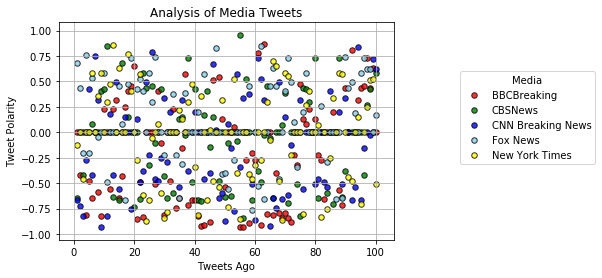

In [6]:
#now = datetime.now()
#now = now.strftime("%m/%d/%Y")
plt.title(f"Analysis of Media Tweets")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(True)

plt.scatter(BBCBreaking["Tweets Ago"], 
            BBCBreaking["Compound"], 
            s=30, c="red", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="BBCBreaking")

plt.scatter(CBSNews["Tweets Ago"], 
            CBSNews["Compound"], 
            s=30, c="green", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="CBSNews")

plt.scatter(cnnbrk["Tweets Ago"], 
            cnnbrk["Compound"], 
            s=30, c="blue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="CNN Breaking News")

plt.scatter(FoxNews["Tweets Ago"], 
            FoxNews["Compound"], 
            s=30, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Fox News")

plt.scatter(nytimes["Tweets Ago"], 
            nytimes["Compound"], 
            s=30, c="yellow", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="New York Times")
# Create a legend
lgnd = plt.legend(fontsize="medium", loc='upper center', 
                  bbox_to_anchor=(1.4, 0.8), title="Media")
plt.savefig("scatter plot.png")

In [7]:
compound_mean = results_df.groupby(["User name"]).mean()["Compound"]

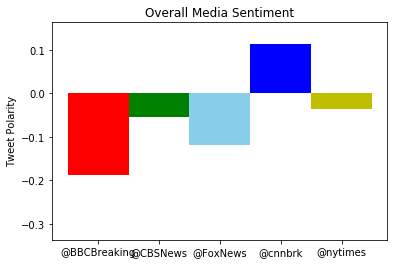

In [8]:
plt.bar(target_user, compound_mean, color=['r','g','b','skyblue','y'], alpha=1, align="center", width =1)

# draw the bar graph 
tick_locations = [value for value in target_user]
plt.xticks(tick_locations, target_user)

plt.xlim(-0.75, len(target_user)-0.25)

plt.ylim(min(compound_mean)-.15, max(compound_mean)+.05)

plt.title(f"Overall Media Sentiment")
plt.ylabel("Tweet Polarity")

# Save Figure
plt.savefig("Overall Media Sentiment.png")

plt.show()